In [1]:
library(tidyverse)
library(readxl)
library(reshape2)

Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.2"Warning message:
"package 'readr' was built under R version 3.4.2"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'readxl' was built under R version 3.4.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidy

# Part 1: Reading in and cleaning the data

In [2]:
# Read in the fantasy football data
fantasy_data <- read_xlsx('FantasyFootballData2020.xlsx')

In [3]:
head(fantasy_data)

Team,Position,Name,Projected,Points,Starter,Week
Team 1,QB,Cam NewtonCam Newton,18.1,25.7,Yes,1
Team 1,RB,Alvin KamaraAlvin Kamara,19.6,23.7,Yes,1
Team 1,RB,Kenyan DrakeKenyan Drake,16.4,14.5,Yes,1
Team 1,WR,DJ MooreDJ Moore,15.0,9.4,Yes,1
Team 1,WR,Amari CooperAmari Cooper,13.4,18.1,Yes,1
Team 1,TE,Rob GronkowskiRob Gronkowski,9.6,3.1,Yes,1


In [4]:
str(fantasy_data)

Classes 'tbl_df', 'tbl' and 'data.frame':	2240 obs. of  7 variables:
 $ Team     : chr  "Team 1" "Team 1" "Team 1" "Team 1" ...
 $ Position : chr  "QB" "RB" "RB" "WR" ...
 $ Name     : chr  "Cam NewtonCam Newton" "Alvin KamaraAlvin Kamara" "Kenyan DrakeKenyan Drake" "DJ MooreDJ Moore" ...
 $ Projected: num  18.1 19.6 16.4 15 13.4 9.6 14.5 6.3 8.7 13.7 ...
 $ Points   : num  25.7 23.7 14.5 9.4 18.1 3.1 9.3 -9 9 6.6 ...
 $ Starter  : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ Week     : num  1 1 1 1 1 1 1 1 1 1 ...


In [5]:
# Clean the data. First correct the Name column to only display no duplicates
fantasy_data$Name <- substr(fantasy_data$Name, 1, (nchar(fantasy_data$Name)/2))

In [6]:
# Change week column to be categorical
fantasy_data$Week <- as.factor(fantasy_data$Week)

In [7]:
# Now the data looks fine and it is time to transform the data and create new tables
str(fantasy_data)

Classes 'tbl_df', 'tbl' and 'data.frame':	2240 obs. of  7 variables:
 $ Team     : chr  "Team 1" "Team 1" "Team 1" "Team 1" ...
 $ Position : chr  "QB" "RB" "RB" "WR" ...
 $ Name     : chr  "Cam Newton" "Alvin Kamara" "Kenyan Drake" "DJ Moore" ...
 $ Projected: num  18.1 19.6 16.4 15 13.4 9.6 14.5 6.3 8.7 13.7 ...
 $ Points   : num  25.7 23.7 14.5 9.4 18.1 3.1 9.3 -9 9 6.6 ...
 $ Starter  : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ Week     : Factor w/ 14 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...


In [8]:
# Add unique id column for later
fantasy_data$unique <- paste0(fantasy_data$Team, fantasy_data$Position, fantasy_data$Week)

# Part 2: Creating data sets

In [9]:
# Summarize point totals by team
point_totals <- fantasy_data %>% filter(Starter == 'Yes') %>%
                                 group_by(Team) %>%
                                 summarize(Actual = sum(Points), Projected = sum(Projected),
                                           Difference = Actual - Projected) 
point_totals                

Team,Actual,Projected,Difference
Team 1,1756.90,1714.2,42.70
Team 10,1982.10,2025.6,-43.50
Team 2,1614.80,1633.6,-18.80
Team 3,1788.90,1844.8,-55.90
Team 4,1617.80,1669.1,-51.30
Team 5,1897.58,1778.7,118.88
Team 6,1490.18,1546.9,-56.72
Team 7,1539.44,1701.7,-162.26
Team 8,1631.68,1636.4,-4.72
Team 9,1796.78,1686.4,110.38


In [10]:
# Summarize point totals by team and week
point_totals_week <- fantasy_data %>% filter(Starter == 'Yes') %>%
                                 group_by(Team, Week) %>%
                                 summarize(Actual = sum(Points), Projected = sum(Projected),
                                           Difference = Actual - Projected) 
head(point_totals_week)       

Team,Week,Actual,Projected,Difference
Team 1,1,103.80,121.6,-17.80
Team 1,2,136.10,119.0,17.10
Team 1,3,163.82,127.4,36.42
Team 1,4,134.88,131.8,3.08
Team 1,5,142.06,126.2,15.86
Team 1,6,123.00,117.7,5.30


In [11]:
# Summarize point totals by team, player, by position, by week
point_totals_player <- fantasy_data %>% filter(Starter == 'Yes') %>%
                                 group_by(Team, Name, Position, Week) %>%
                                 summarize(Actual = sum(Points), Projected = sum(Projected),
                                           Difference = Actual - Projected) 
head(point_totals_player) 

Team,Name,Position,Week,Actual,Projected,Difference
Team 1,Aaron Rodgers,QB,2,19.20,18.0,1.20
Team 1,Aaron Rodgers,QB,3,24.52,18.0,6.52
Team 1,Aaron Rodgers,QB,4,29.58,21.1,8.48
Team 1,Aaron Rodgers,QB,6,3.80,19.4,-15.60
Team 1,Aaron Rodgers,QB,7,27.32,20.6,6.72
Team 1,Aaron Rodgers,QB,8,22.54,19.2,3.34


# Part 3: Decision making metrics

In [9]:
# We want to create something that takes a look at starters vs bench and see if a bench
# player has  more actual points than a starter of the same position. If yes, then create a column
# with a 1 else 0.

In [10]:
# Find the max value by Team, Position, and Week
max <- aggregate(Points ~ Team + Position + Week, fantasy_data, function(x) {max(x)})

# Add unique id column
max$unique <- paste0(max$Team, max$Position, max$Week)

# Rename Points column to Largest
max <- max %>% rename(Largest = Points)

In [11]:
head(max)

Team,Position,Week,Largest,unique
Team 1,D/ST,1,-9,Team 1D/ST1
Team 10,D/ST,1,17,Team 10D/ST1
Team 2,D/ST,1,12,Team 2D/ST1
Team 3,D/ST,1,10,Team 3D/ST1
Team 4,D/ST,1,5,Team 4D/ST1
Team 5,D/ST,1,3,Team 5D/ST1


In [12]:
# Find the second largest value by Team, Position, and Week
max2 <- aggregate(Points ~ Team + Position + Week, fantasy_data, function(x) {tail(sort(x), 2)[1]})

# Add unique id column
max2$unique <- paste0(max2$Team, max2$Position, max2$Week)

# Rename Points column to SecLargest
max2 <- max2 %>% rename(SecLargest = Points)

In [13]:
head(max2)

Team,Position,Week,SecLargest,unique
Team 1,D/ST,1,-9,Team 1D/ST1
Team 10,D/ST,1,10,Team 10D/ST1
Team 2,D/ST,1,12,Team 2D/ST1
Team 3,D/ST,1,10,Team 3D/ST1
Team 4,D/ST,1,5,Team 4D/ST1
Team 5,D/ST,1,3,Team 5D/ST1


In [14]:
# Combine max and max2 tables
combine <- merge(max, max2, by='unique')

In [15]:
head(combine)

unique,Team.x,Position.x,Week.x,Largest,Team.y,Position.y,Week.y,SecLargest
Team 10D/ST1,Team 10,D/ST,1,17,Team 10,D/ST,1,10
Team 10D/ST10,Team 10,D/ST,10,11,Team 10,D/ST,10,2
Team 10D/ST11,Team 10,D/ST,11,16,Team 10,D/ST,11,16
Team 10D/ST12,Team 10,D/ST,12,16,Team 10,D/ST,12,16
Team 10D/ST13,Team 10,D/ST,13,3,Team 10,D/ST,13,3
Team 10D/ST14,Team 10,D/ST,14,13,Team 10,D/ST,14,5


In [16]:
# Keep only the unique, Largest, and SecLargest columns and then combine combine and 
# original dataset
combine <- combine %>% select(unique, Largest, SecLargest)
final <- merge(fantasy_data, combine, by = 'unique')

In [17]:
# Create column where it looks to see if starters have highest points and if not then 1
final$BadDecision <- ifelse((final$Position == 'RB' | final$Position == 'WR') &
                             (final$Points != final$Largest & final$Points != final$SecLargest), 1,
                     ifelse(!(final$Position == 'RB' | final$Position == 'WR') &
                             (final$Points != final$Largest), 1, 0))

In [18]:
str(final)

'data.frame':	2240 obs. of  11 variables:
 $ unique     : chr  "Team 10D/ST1" "Team 10D/ST1" "Team 10D/ST10" "Team 10D/ST10" ...
 $ Team       : chr  "Team 10" "Team 10" "Team 10" "Team 10" ...
 $ Position   : chr  "D/ST" "D/ST" "D/ST" "D/ST" ...
 $ Name       : chr  "Steelers D/ST" "Saints D/ST" "Steelers D/ST" "Eagles D/ST" ...
 $ Projected  : num  8.2 4.7 6.5 7.5 7.2 7.5 7.5 6.8 5.6 7.9 ...
 $ Points     : num  10 17 11 2 16 16 3 13 5 13 ...
 $ Starter    : chr  "Yes" "No" "No" "Yes" ...
 $ Week       : Factor w/ 14 levels "1","2","3","4",..: 1 1 10 10 11 12 13 14 14 2 ...
 $ Largest    : num  17 17 11 11 16 16 3 13 13 13 ...
 $ SecLargest : num  10 10 2 2 16 16 3 5 5 13 ...
 $ BadDecision: num  1 0 0 1 0 0 0 0 1 0 ...


In [19]:
# Create a table of total bad decisions by team
final_bad_dec <- final %>% filter(Starter == 'Yes') %>%
                           group_by(Team) %>% 
                           summarize(TotalBadDecisions = sum(BadDecision))

In [20]:
final_bad_dec

Team,TotalBadDecisions
Team 1,37
Team 10,42
Team 2,38
Team 3,40
Team 4,32
Team 5,32
Team 6,39
Team 7,44
Team 8,39
Team 9,38


In [21]:
# Export final dataset
write.csv(final, "final_fantasy_2020_data.csv")

# Part 4: Visualizations and Tables

In [22]:
# Summarize point totals by team
point_totals <- fantasy_data %>% filter(Starter == 'Yes') %>%
                                 group_by(Team) %>%
                                 summarize(Actual = sum(Points), Projected = sum(Projected)) 

# Transform point total dataset by using melt function
point_totals_comp <- melt(point_totals, id.vars = 'Team')
point_totals_comp <- point_totals_comp %>% rename(PointType = variable, Points = value)

In [23]:
head(point_totals_comp)

Team,PointType,Points
Team 1,Actual,1756.90
Team 10,Actual,1738.20
Team 2,Actual,1772.76
Team 3,Actual,1788.90
Team 4,Actual,1617.80
Team 5,Actual,1897.58


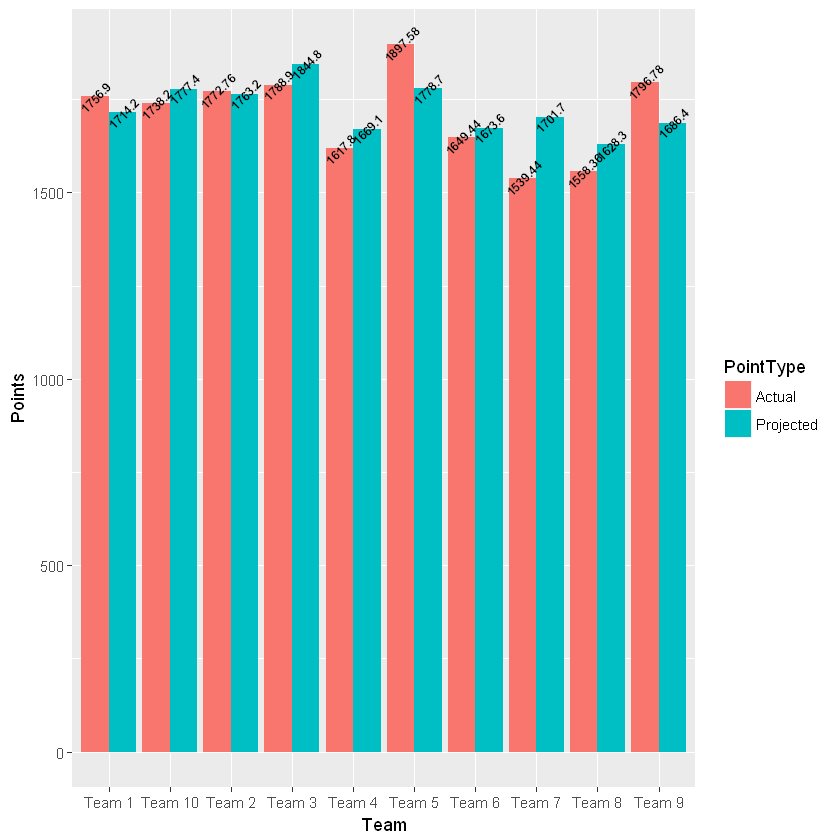

In [24]:
# Create visualization for point totals by team and put in the side projected as well
point_totals_comp %>% ggplot(aes(x = Team, y = Points, fill = PointType)) + 
                        geom_bar(stat = "identity", position='dodge') + 
                        geom_text(aes(label=Points), angle = 45, color="black", size=2.5, 
                                  fontface = "bold", position = position_dodge(.9))

In [25]:
# Summarize point totals by team and Week
point_totals_week <- fantasy_data %>% filter(Starter == 'Yes') %>%
                                 group_by(Team, Week) %>%
                                 summarize(Actual = sum(Points), Projected = sum(Projected)) 
head(point_totals_week)

# Transform point total dataset by using melt function
point_totals_week_comp <- melt(point_totals_week, id.vars = c('Team', 'Week'))
point_totals_week_comp <- point_totals_week_comp %>% rename(PointType = variable, Points = value)

Team,Week,Actual,Projected
Team 1,1,103.80,121.6
Team 1,2,136.10,119.0
Team 1,3,163.82,127.4
Team 1,4,134.88,131.8
Team 1,5,142.06,126.2
Team 1,6,123.00,117.7


In [26]:
str(point_totals_week_comp)

'data.frame':	280 obs. of  4 variables:
 $ Team     : chr  "Team 1" "Team 1" "Team 1" "Team 1" ...
 $ Week     : Factor w/ 14 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ PointType: Factor w/ 2 levels "Actual","Projected": 1 1 1 1 1 1 1 1 1 1 ...
 $ Points   : num  104 136 164 135 142 ...


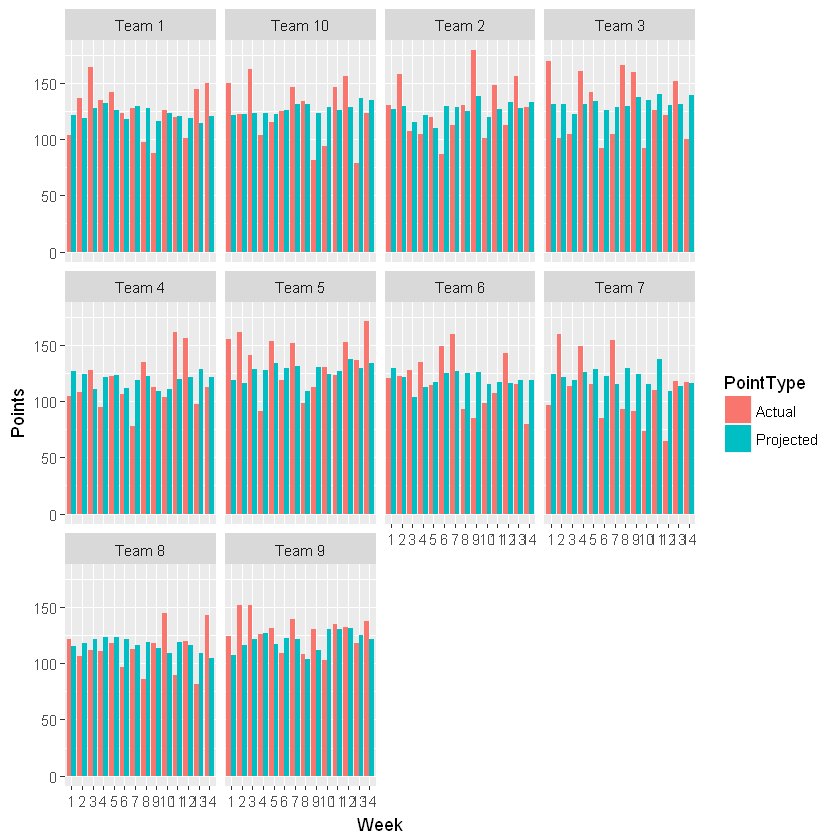

In [27]:
# Create visualization for point totals by week and make a visualization by team
point_totals_week_comp %>% ggplot(aes(x = Week, y = Points, fill = PointType)) +
                                  geom_bar(stat = "identity", position='dodge') +
                                  facet_wrap(~ Team)

In [28]:
#Who are the top scorers vs top projected in the season
top_player <- fantasy_data %>% filter(Starter == 'Yes') %>%
                                 group_by(Team, Position, Name) %>%
                                 summarize(Actual = sum(Points)) %>%
                                 arrange(desc(Actual))

head(top_player, 10)

Team,Position,Name,Actual
Team 4,QB,Patrick Mahomes,329.32
Team 1,RB,Alvin Kamara,303.20
Team 4,WR,Tyreek Hill,301.00
Team 5,QB,Deshaun Watson,293.34
Team 9,QB,Kyler Murray,291.56
Team 3,WR,Davante Adams,287.40
Team 1,QB,Aaron Rodgers,283.04
Team 10,QB,Russell Wilson,277.92
Team 2,TE,Travis Kelce,267.16
Team 10,RB,Derrick Henry,243.80


In [29]:
# Who is the top 5 scorers by position for the year
point_totals_players <- fantasy_data %>% filter(Starter == 'Yes') %>%
                                 group_by(Position, Name) %>%
                                 summarize(Actual = sum(Points))

In [30]:
# Get the best 5 players by position for the season
best_5 <- point_totals_players[order(point_totals_players$Actual, decreasing = TRUE), ]
best_5 <- by(best_5, best_5["Position"], head, n=5)
best_5

Position: D/ST
# A tibble: 5 x 3
# Groups: Position [1]
  Position Name            Actual
  <chr>    <chr>            <dbl>
1 D/ST     Steelers D/ST     99.0
2 D/ST     Colts D/ST        89.0
3 D/ST     Ravens D/ST       85.0
4 D/ST     Rams D/ST         82.0
5 D/ST     Washington D/ST   64.0
------------------------------------------------------------ 
Position: K
# A tibble: 5 x 3
# Groups: Position [1]
  Position Name            Actual
  <chr>    <chr>            <dbl>
1 K        Justin Tucker      117
2 K        Harrison Butker    116
3 K        Ryan Succop        108
4 K        Wil Lutz           107
5 K        Younghoe Koo       106
------------------------------------------------------------ 
Position: QB
# A tibble: 5 x 3
# Groups: Position [1]
  Position Name            Actual
  <chr>    <chr>            <dbl>
1 QB       Patrick Mahomes    329
2 QB       Deshaun Watson     293
3 QB       Kyler Murray       292
4 QB       Aaron Rodgers      283
5 QB       Russell Wilson     278

In [31]:
# Who is the top 5 scorers by Team for the year
point_totals_mvps <- fantasy_data %>% filter(Starter == 'Yes') %>%
                                 group_by(Team, Name) %>%
                                 summarize(Actual = sum(Points))

In [32]:
# Get the best 5 players by team for the season
best_5_team <- point_totals_mvps[order(point_totals_mvps$Actual, decreasing = TRUE), ]
best_5_team <- by(best_5_team, best_5_team["Team"], head, n=5)
best_5_team

Team: Team 1
# A tibble: 5 x 3
# Groups: Team [1]
  Team   Name          Actual
  <chr>  <chr>          <dbl>
1 Team 1 Alvin Kamara     303
2 Team 1 Aaron Rodgers    283
3 Team 1 Amari Cooper     185
4 Team 1 Mike Davis       165
5 Team 1 DJ Moore         149
------------------------------------------------------------ 
Team: Team 10
# A tibble: 5 x 3
# Groups: Team [1]
  Team    Name           Actual
  <chr>   <chr>           <dbl>
1 Team 10 Russell Wilson    278
2 Team 10 Derrick Henry     244
3 Team 10 Adam Thielen      191
4 Team 10 Terry McLaurin    156
5 Team 10 Tyler Boyd        129
------------------------------------------------------------ 
Team: Team 2
# A tibble: 5 x 3
# Groups: Team [1]
  Team   Name             Actual
  <chr>  <chr>             <dbl>
1 Team 2 Travis Kelce        267
2 Team 2 Keenan Allen        242
3 Team 2 Josh Allen          213
4 Team 2 Cooper Kupp         185
5 Team 2 David Montgomery    179
------------------------------------------------------------

# Part 5: What if analysis